In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv_new'

In [3]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\uv_train_val")
forders_tr

['uv_train.csv']

In [5]:
df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\uv_train_val\\")+forders_tr[0])

In [24]:
# df[df['yyyymmdd'] == 20210801].index[0]  # 1209883
# df.iloc[df[df['yyyymmdd'] == 20210801].index[0]:]
# df.iloc[:df[df['yyyymmdd'] == 20210801].index[0]]


tr1 = df.iloc[df[df['yyyymmdd'] == 20200501].index[0]:df[df['yyyymmdd'] == 20201101].index[0]]
tr2 = df.iloc[df[df['yyyymmdd'] == 20210501].index[0]:df[df['yyyymmdd'] == 20210801].index[0]]

train = pd.concat([tr1,tr2],axis=0)
train

val = df.iloc[df[df['yyyymmdd'] == 20210801].index[0]:df[df['yyyymmdd'] == 20211101].index[0]]
val

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
1209883,20210801,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,0.00089,-0.00015,...,264.44311,290.55389,288.92546,284.67080,270.70772,127.16116,38.96359,-5.60122,71.00,0
1209884,20210801,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00015,...,259.14507,283.10942,282.76528,280.43877,268.61000,123.36327,43.95463,-5.09260,26.04,3
1209885,20210801,0,108,126.96500,37.57100,0.0,0.00000,0.00057,-0.00119,0.00120,...,252.93837,273.65182,270.18990,267.15459,258.99048,123.18739,43.77999,-5.07447,85.50,3
1209886,20210801,0,112,126.62490,37.47772,0.0,0.00000,0.00000,-0.00030,-0.00060,...,250.27920,268.14394,268.04466,266.56403,259.34748,123.22507,43.67046,-5.08058,68.99,3
1209887,20210801,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00000,-0.00015,...,263.38986,289.67998,288.05013,284.04277,269.26719,123.91259,43.74521,-5.16058,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403209,20211031,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00015,...,243.98668,261.95199,261.21896,259.29863,250.50021,157.14313,41.81018,-8.56636,62.90,3
1403210,20211031,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00089,0.00120,...,255.89419,281.48837,281.57322,280.00595,265.73255,157.99342,41.52495,-8.67521,82.00,2
1403211,20211031,2350,156,126.89158,35.17294,0.0,0.00057,0.00000,0.00000,0.00015,...,246.57815,265.43902,264.76641,262.60697,252.65714,157.69250,41.04849,-8.59148,72.38,3
1403212,20211031,2350,159,129.03203,35.10468,0.0,0.00057,0.00000,-0.00179,-0.00060,...,257.75436,284.11394,283.85736,280.96228,265.34129,158.37811,40.96396,-8.68840,69.56,3


In [4]:
# summer_tr = forders_tr[4:10] + forders_tr[12+4:12+10-3]
# summer_tr

# summer_val = forders_tr[12+10-3:12+10]
# summer_val

['2108_uv_nooutlier.csv', '2109_uv_nooutlier.csv', '2110_uv_nooutlier.csv']

In [5]:
# train = pd.DataFrame()

# for files in summer_tr:
#     df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\uv_train_val\\")+files)
#     train = pd.concat([train, df])
    
# train.drop('idx', axis=1, inplace=True)
# train

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200501,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,-0.00030,0.00165,...,252.91737,277.63245,277.03649,275.67037,262.71147,130.35092,38.96359,-6.11462,71.00,0
1,20200501,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,-0.00060,-0.00090,...,256.69212,286.82011,287.23821,285.51819,269.40510,126.43187,43.95463,-5.60867,26.04,3
2,20200501,0,108,126.96500,37.57100,0.0,0.00000,0.00000,0.00000,0.00090,...,253.85590,281.28558,281.42512,280.03692,266.81080,126.31564,43.77999,-5.59822,85.50,3
3,20200501,0,112,126.62490,37.47772,0.0,0.00000,0.00000,0.00089,0.00030,...,254.78101,283.03827,283.39275,282.06360,268.05385,126.36437,43.67046,-5.60546,68.99,3
4,20200501,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00030,0.00075,...,251.68704,277.82840,278.25056,275.71853,262.56565,126.91833,43.74521,-5.66707,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65607,20210731,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00060,...,264.53165,291.90287,290.09587,285.48855,270.82702,124.36364,41.81018,-4.72602,62.90,3
65608,20210731,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,0.00000,-0.00030,...,262.88449,288.27382,286.67481,282.45891,269.23268,125.09137,41.52495,-4.87156,82.00,2
65609,20210731,2350,156,126.89158,35.17294,0.0,-0.00057,0.00000,0.00000,0.00015,...,262.57588,287.50208,284.96722,280.05240,267.56515,124.95628,41.04849,-4.79509,72.38,3
65610,20210731,2350,159,129.03203,35.10468,0.0,0.00000,0.00000,-0.00119,0.00000,...,262.22936,287.43410,286.66069,283.63739,270.60537,125.49764,40.96396,-4.91507,69.56,3


In [23]:
ratio=[]
num = []
for i in range(len(train.columns)):
    ratio.append(len(train[train[train.columns[i]] == -999.0])/len(train))
    num.append(len(train[train[train.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [25]:
# val = pd.DataFrame()

# for files in summer_val:
#     df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+files)
#     val = pd.concat([val, df])
    
# val.drop('idx', axis=1, inplace=True)
# val

In [26]:
ratio=[]
num = []
for i in range(len(val.columns)):
    ratio.append(len(val[val[val.columns[i]] == -999.0])/len(val))
    num.append(len(val[val[val.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [27]:
forders_te = os.listdir(curr_dir+"\\data\\"+"\\uv_test")
forders_te

['uv_test.csv']

In [29]:
# forders_te = os.listdir(curr_dir+"\\data\\"+"\\test")
# forders_te

df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\uv_test\\")+forders_te[0])
# d = list(df.columns)
# for j in range(1,len(d)):
#     d[j] = d[j].replace("202206_uv.", "")
# df.columns = d
# df.drop('Unnamed: 0', axis=1, inplace=True)
test = df
test.describe()
test

,yyyymmdd,hhnn,STN,Lon,Lat,UV,Band1,Band2,Band3,Band4,...,Band12,Band13,Band14,Band15,Band16,SolarZA,SateZA,ESR,Height,LandType
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220601,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220601,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220601,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220601,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [35]:
low = test.columns.str.lower() 
low
test.columns = low
test

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220601,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220601,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220601,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220601,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [36]:
ratio=[]
num = []
for i in range(len(test.columns)):
    ratio.append(len(test[test[test.columns[i]] == -999.0])/len(test))
    num.append(len(test[test[test.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Model

In [30]:
# X_test = test.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)

In [37]:
X_train = train.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'], axis=1)
X_val = val.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)
X_test = test.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)

y_train = train[['uv']].values
y_val = val[['uv']].values

params = {
    'n_estimators': [500, 1000, 3000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [5, 7, 9, 11], 
#     'colsample_bytree': [0.8, 0.9], 
#     'subsample': [0.8, 0.9],
    'num_leaves':[31]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train, 
          eval_set=[(X_val, y_val)],
          eval_metric=["mse"],
          early_stopping_rounds=200,
          verbose=True)                    


C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[1]	valid_0's l2: 3.92033
[2]	valid_0's l2: 3.59571
[3]	valid_0's l2: 3.30281
[4]	valid_0's l2: 3.03969
[5]	valid_0's l2: 2.7967
[6]	valid_0's l2: 2.58279
[7]	valid_0's l2: 2.38051
[8]	valid_0's l2: 2.20211
[9]	valid_0's l2: 2.04244
[10]	valid_0's l2: 1.89244
[11]	valid_0's l2: 1.75616
[12]	valid_0's l2: 1.63227
[13]	valid_0's l2: 1.51965
[14]	valid_0's l2: 1.4183
[15]	valid_0's l2: 1.32697
[16]	valid_0's l2: 1.24378
[17]	valid_0's l2: 1.1663
[18]	valid_0's l2: 1.09619
[19]	valid_0's l2: 1.03387
[20]	valid_0's l2: 0.975928
[21]	valid_0's l2: 0.923881
[22]	valid_0's l2: 0.876743
[23]	valid_0's l2: 0.83356
[24]	valid_0's l2: 0.793644
[25]	valid_0's l2: 0.75701
[26]	valid_0's l2: 0.724025
[27]	valid_0's l2: 0.693817
[28]	valid_0's l2: 0.66639
[29]	valid_0's l2: 0.641127
[30]	valid_0's l2: 0.617146
[31]	valid_0's l2: 0.596377
[32]	valid_0's l2: 0.575929
[33]	valid_0's l2: 0.55707
[34]	valid_0's l2: 0.53967
[35]	valid_0's l2: 0.52431
[36]	valid_0's l2: 0.50963
[37]	valid_0's l2: 0.49628
[38

[290]	valid_0's l2: 0.268144
[291]	valid_0's l2: 0.267987
[292]	valid_0's l2: 0.267951
[293]	valid_0's l2: 0.267854
[294]	valid_0's l2: 0.26771
[295]	valid_0's l2: 0.267659
[296]	valid_0's l2: 0.267565
[297]	valid_0's l2: 0.267532
[298]	valid_0's l2: 0.267528
[299]	valid_0's l2: 0.267351
[300]	valid_0's l2: 0.267253
[301]	valid_0's l2: 0.267198
[302]	valid_0's l2: 0.267228
[303]	valid_0's l2: 0.267185
[304]	valid_0's l2: 0.26718
[305]	valid_0's l2: 0.267194
[306]	valid_0's l2: 0.267124
[307]	valid_0's l2: 0.266992
[308]	valid_0's l2: 0.266938
[309]	valid_0's l2: 0.266918
[310]	valid_0's l2: 0.266807
[311]	valid_0's l2: 0.266706
[312]	valid_0's l2: 0.266617
[313]	valid_0's l2: 0.266575
[314]	valid_0's l2: 0.26641
[315]	valid_0's l2: 0.266329
[316]	valid_0's l2: 0.26623
[317]	valid_0's l2: 0.266152
[318]	valid_0's l2: 0.266113
[319]	valid_0's l2: 0.266055
[320]	valid_0's l2: 0.266036
[321]	valid_0's l2: 0.266065
[322]	valid_0's l2: 0.266062
[323]	valid_0's l2: 0.266021
[324]	valid_0's l2

[576]	valid_0's l2: 0.258433
[577]	valid_0's l2: 0.258398
[578]	valid_0's l2: 0.258382
[579]	valid_0's l2: 0.258404
[580]	valid_0's l2: 0.258385
[581]	valid_0's l2: 0.258372
[582]	valid_0's l2: 0.258344
[583]	valid_0's l2: 0.258337
[584]	valid_0's l2: 0.258318
[585]	valid_0's l2: 0.258282
[586]	valid_0's l2: 0.258264
[587]	valid_0's l2: 0.258236
[588]	valid_0's l2: 0.258207
[589]	valid_0's l2: 0.258197
[590]	valid_0's l2: 0.258206
[591]	valid_0's l2: 0.258195
[592]	valid_0's l2: 0.258188
[593]	valid_0's l2: 0.258191
[594]	valid_0's l2: 0.258185
[595]	valid_0's l2: 0.258185
[596]	valid_0's l2: 0.258163
[597]	valid_0's l2: 0.25816
[598]	valid_0's l2: 0.258103
[599]	valid_0's l2: 0.258069
[600]	valid_0's l2: 0.258074
[601]	valid_0's l2: 0.258062
[602]	valid_0's l2: 0.258056
[603]	valid_0's l2: 0.258047
[604]	valid_0's l2: 0.258003
[605]	valid_0's l2: 0.257994
[606]	valid_0's l2: 0.257938
[607]	valid_0's l2: 0.257923
[608]	valid_0's l2: 0.257901
[609]	valid_0's l2: 0.257857
[610]	valid_0's

[863]	valid_0's l2: 0.254991
[864]	valid_0's l2: 0.254982
[865]	valid_0's l2: 0.254986
[866]	valid_0's l2: 0.254973
[867]	valid_0's l2: 0.254983
[868]	valid_0's l2: 0.254972
[869]	valid_0's l2: 0.254976
[870]	valid_0's l2: 0.254959
[871]	valid_0's l2: 0.254952
[872]	valid_0's l2: 0.254956
[873]	valid_0's l2: 0.254941
[874]	valid_0's l2: 0.254952
[875]	valid_0's l2: 0.254967
[876]	valid_0's l2: 0.25497
[877]	valid_0's l2: 0.254921
[878]	valid_0's l2: 0.254928
[879]	valid_0's l2: 0.254938
[880]	valid_0's l2: 0.254949
[881]	valid_0's l2: 0.25489
[882]	valid_0's l2: 0.25488
[883]	valid_0's l2: 0.254866
[884]	valid_0's l2: 0.254859
[885]	valid_0's l2: 0.254843
[886]	valid_0's l2: 0.254787
[887]	valid_0's l2: 0.254752
[888]	valid_0's l2: 0.254737
[889]	valid_0's l2: 0.254725
[890]	valid_0's l2: 0.25472
[891]	valid_0's l2: 0.254712
[892]	valid_0's l2: 0.25468
[893]	valid_0's l2: 0.254631
[894]	valid_0's l2: 0.254614
[895]	valid_0's l2: 0.254646
[896]	valid_0's l2: 0.254623
[897]	valid_0's l2:

[1145]	valid_0's l2: 0.253456
[1146]	valid_0's l2: 0.253462
[1147]	valid_0's l2: 0.253441
[1148]	valid_0's l2: 0.253438
[1149]	valid_0's l2: 0.253431
[1150]	valid_0's l2: 0.253425
[1151]	valid_0's l2: 0.253418
[1152]	valid_0's l2: 0.253424
[1153]	valid_0's l2: 0.253421
[1154]	valid_0's l2: 0.253412
[1155]	valid_0's l2: 0.2534
[1156]	valid_0's l2: 0.253377
[1157]	valid_0's l2: 0.253374
[1158]	valid_0's l2: 0.25337
[1159]	valid_0's l2: 0.253383
[1160]	valid_0's l2: 0.253381
[1161]	valid_0's l2: 0.253404
[1162]	valid_0's l2: 0.253408
[1163]	valid_0's l2: 0.253391
[1164]	valid_0's l2: 0.253389
[1165]	valid_0's l2: 0.253373
[1166]	valid_0's l2: 0.253362
[1167]	valid_0's l2: 0.253369
[1168]	valid_0's l2: 0.253364
[1169]	valid_0's l2: 0.253366
[1170]	valid_0's l2: 0.253367
[1171]	valid_0's l2: 0.253365
[1172]	valid_0's l2: 0.253358
[1173]	valid_0's l2: 0.253348
[1174]	valid_0's l2: 0.253349
[1175]	valid_0's l2: 0.253338
[1176]	valid_0's l2: 0.253332
[1177]	valid_0's l2: 0.253332
[1178]	valid_

[1424]	valid_0's l2: 0.252936
[1425]	valid_0's l2: 0.252929
[1426]	valid_0's l2: 0.25291
[1427]	valid_0's l2: 0.252918
[1428]	valid_0's l2: 0.252909
[1429]	valid_0's l2: 0.252914
[1430]	valid_0's l2: 0.252909
[1431]	valid_0's l2: 0.25291
[1432]	valid_0's l2: 0.252919
[1433]	valid_0's l2: 0.252929
[1434]	valid_0's l2: 0.252941
[1435]	valid_0's l2: 0.252914
[1436]	valid_0's l2: 0.252906
[1437]	valid_0's l2: 0.252903
[1438]	valid_0's l2: 0.252915
[1439]	valid_0's l2: 0.252921
[1440]	valid_0's l2: 0.252925
[1441]	valid_0's l2: 0.252934
[1442]	valid_0's l2: 0.252943
[1443]	valid_0's l2: 0.252946
[1444]	valid_0's l2: 0.252948
[1445]	valid_0's l2: 0.252961
[1446]	valid_0's l2: 0.252951
[1447]	valid_0's l2: 0.252954
[1448]	valid_0's l2: 0.252961
[1449]	valid_0's l2: 0.252962
[1450]	valid_0's l2: 0.252959
[1451]	valid_0's l2: 0.252957
[1452]	valid_0's l2: 0.252942
[1453]	valid_0's l2: 0.252952
[1454]	valid_0's l2: 0.252934
[1455]	valid_0's l2: 0.252937
[1456]	valid_0's l2: 0.252942
[1457]	valid

[1699]	valid_0's l2: 0.252626
[1700]	valid_0's l2: 0.252621
[1701]	valid_0's l2: 0.252615
[1702]	valid_0's l2: 0.25261
[1703]	valid_0's l2: 0.252618
[1704]	valid_0's l2: 0.252612
[1705]	valid_0's l2: 0.25262
[1706]	valid_0's l2: 0.252609
[1707]	valid_0's l2: 0.252608
[1708]	valid_0's l2: 0.252603
[1709]	valid_0's l2: 0.252606
[1710]	valid_0's l2: 0.252608
[1711]	valid_0's l2: 0.252608
[1712]	valid_0's l2: 0.252623
[1713]	valid_0's l2: 0.252625
[1714]	valid_0's l2: 0.252622
[1715]	valid_0's l2: 0.252615
[1716]	valid_0's l2: 0.252613
[1717]	valid_0's l2: 0.252627
[1718]	valid_0's l2: 0.252629
[1719]	valid_0's l2: 0.252626
[1720]	valid_0's l2: 0.252624
[1721]	valid_0's l2: 0.252625
[1722]	valid_0's l2: 0.252626
[1723]	valid_0's l2: 0.252634
[1724]	valid_0's l2: 0.252639
[1725]	valid_0's l2: 0.252631
[1726]	valid_0's l2: 0.252641
[1727]	valid_0's l2: 0.252645
[1728]	valid_0's l2: 0.252636
[1729]	valid_0's l2: 0.252637
[1730]	valid_0's l2: 0.252631
[1731]	valid_0's l2: 0.252607
[1732]	valid

[1977]	valid_0's l2: 0.252238
[1978]	valid_0's l2: 0.2522
[1979]	valid_0's l2: 0.252202
[1980]	valid_0's l2: 0.252199
[1981]	valid_0's l2: 0.2522
[1982]	valid_0's l2: 0.252195
[1983]	valid_0's l2: 0.252205
[1984]	valid_0's l2: 0.252208
[1985]	valid_0's l2: 0.252206
[1986]	valid_0's l2: 0.252202
[1987]	valid_0's l2: 0.252203
[1988]	valid_0's l2: 0.252202
[1989]	valid_0's l2: 0.2522
[1990]	valid_0's l2: 0.252199
[1991]	valid_0's l2: 0.252206
[1992]	valid_0's l2: 0.252206
[1993]	valid_0's l2: 0.252208
[1994]	valid_0's l2: 0.252199
[1995]	valid_0's l2: 0.252206
[1996]	valid_0's l2: 0.252207
[1997]	valid_0's l2: 0.252207
[1998]	valid_0's l2: 0.252209
[1999]	valid_0's l2: 0.252209
[2000]	valid_0's l2: 0.252217
[2001]	valid_0's l2: 0.25222
[2002]	valid_0's l2: 0.252225
[2003]	valid_0's l2: 0.252223
[2004]	valid_0's l2: 0.252234
[2005]	valid_0's l2: 0.252233
[2006]	valid_0's l2: 0.252226
[2007]	valid_0's l2: 0.252234
[2008]	valid_0's l2: 0.252235
[2009]	valid_0's l2: 0.252236
[2010]	valid_0's 

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})

In [38]:
grid_search.best_score_

# grid_search.best_params

0.9270887685811391

In [39]:
grid_search

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})

In [40]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 3000, 'num_leaves': 31}

In [43]:
# grid_search.save('lgbm_gs.h5')

In [41]:
grid_search.best_estimator_

LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=3000)

In [42]:
import joblib

#save your model or results
joblib.dump(grid_search, 'lgbm_gs1.pkl')

# #load your model for further usage
# joblib.load("model_file_name.pkl")


['lgbm_gs1.pkl']

In [44]:
model_gs1 = joblib.load("lgbm_gs1.pkl")
model_gs1

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})

In [18]:
# max_depth = 5
# n_estimators = 5000             # 400  #1000
# lr = 0.01                     # 0.017
# num_leaves = 31
# early_stopping_rounds = 300      # 100
# verbose = True                  # True

In [15]:
# X_train = train.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'], axis=1)
# X_val = val.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)
# X_test = test.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)

# y_train = train[['uv']].values
# y_val = val[['uv']].values




# lgbm_reg = LGBMRegressor(objective= "regression",
#                      max_depth= max_depth,
#                      n_estimators= n_estimators,
#                      learning_rate= lr,
#                      num_leaves = num_leaves)
    
# lgbm_reg.fit(X_train, y_train,
#           eval_set=[(X_val, y_val)],
#           eval_metric=["mse"],
#           early_stopping_rounds=early_stopping_rounds,
#           verbose=verbose) 




In [45]:
pred = model_gs1.predict(X_test)
pred

array([-0.00232203, -0.02160103, -0.00957699, ..., -0.00584976,
        0.00657234, -0.01388244])

In [66]:
pred = model_gs1.predict(X_test)
submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
submission1=submission.copy()
submission1['UV'] = pred
submission1
submission1.to_csv("220224_lgbm_uv_nooutlier_summer1_gs1.csv", index = False)

In [100]:
# X_test111.to_csv('202206_uv_final.csv', index=False)

In [101]:
# pd.read_csv('202206_uv_final.csv')

,yyyymmdd,hhnn,stn,lon,lat,band1,band2,band3,band4,band5,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,0.00000,0.00000,-0.00060,0.00060,-0.0003,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,-0.00057,-0.00057,0.00000,-0.00030,0.0000,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,0.00000,-0.00057,-0.00030,0.00045,0.0000,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,0.00000,0.00000,0.00060,0.00045,-0.0003,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,0.00000,0.00000,0.00089,-0.00030,0.0003,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,0.00000,-0.00057,-0.00089,0.00015,0.0000,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220625,0,152,129.33472,35.58250,-0.00057,0.00000,-0.00030,-0.00030,-0.0003,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220625,0,156,126.89158,35.17294,0.00000,0.00000,0.00089,-0.00030,-0.0003,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220625,0,159,129.03203,35.10468,0.00000,0.00057,0.00030,-0.00075,-0.0003,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [47]:
submission1

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,-0.002322
1,202206010000,105,-0.021601
2,202206010000,108,-0.009577
3,202206010000,112,-0.019824
4,202206010000,115,-0.000143
...,...,...,...
51850,202206250000,146,0.011431
51851,202206250000,152,0.006863
51852,202206250000,156,-0.005850
51853,202206250000,159,0.006572


In [48]:
submission1['UV'].value_counts()      # 정렬해서 보기

 0.001661    32
 0.002035    32
 0.002516    29
-0.004788    28
 0.007039    27
             ..
 0.050007     1
 0.040132     1
 0.012567     1
 0.104019     1
 0.006572     1
Name: UV, Length: 48418, dtype: int64

<AxesSubplot:>

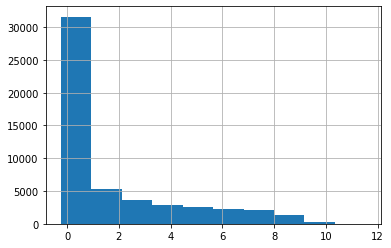

In [49]:
submission1['UV'].hist()      

<AxesSubplot:>

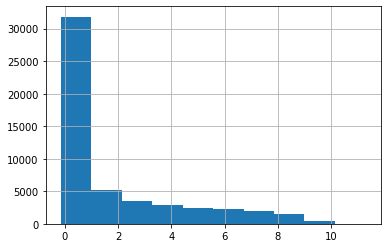

In [50]:
ddd = pd.read_csv('220224_lgbm_uv_nooutlier_summer1_gs.csv')
ddd['UV'].hist()

<AxesSubplot:>

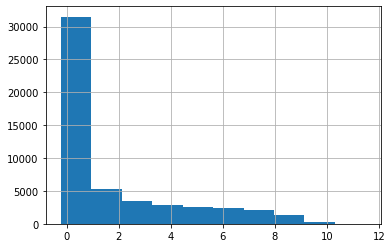

In [64]:
ddd1 = pd.read_csv('220224_lgbm_uv_nooutlier_summer1.csv')
ddd1['UV'].hist()

In [51]:
submission1[submission1['UV']<1]

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,-0.002322
1,202206010000,105,-0.021601
2,202206010000,108,-0.009577
3,202206010000,112,-0.019824
4,202206010000,115,-0.000143
...,...,...,...
51850,202206250000,146,0.011431
51851,202206250000,152,0.006863
51852,202206250000,156,-0.005850
51853,202206250000,159,0.006572


In [52]:
submission1[submission1['UV']<7]

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,-0.002322
1,202206010000,105,-0.021601
2,202206010000,108,-0.009577
3,202206010000,112,-0.019824
4,202206010000,115,-0.000143
...,...,...,...
51850,202206250000,146,0.011431
51851,202206250000,152,0.006863
51852,202206250000,156,-0.005850
51853,202206250000,159,0.006572


# 아래는 비율 확인한 것

In [53]:
ddd

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,-0.003720
1,202206010000,105,-0.005291
2,202206010000,108,-0.002185
3,202206010000,112,0.001383
4,202206010000,115,0.000958
...,...,...,...
51850,202206250000,146,0.005621
51851,202206250000,152,-0.002203
51852,202206250000,156,0.006888
51853,202206250000,159,0.005210


In [60]:
li = list(submission1['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,25.077620
0_1,36.538424
1_2,8.832321
2_3,6.030277
3_4,5.156687
4_5,4.285026
5_6,4.045897
6_7,3.629351
7_8,3.320798
8_9,2.254363


In [61]:
li = list(ddd['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,16.900974
0_1,44.502941
1_2,8.903674
2_3,6.159483
3_4,5.133545
4_5,4.333237
5_6,3.951403
6_7,3.633208
7_8,3.332369
8_9,2.306431


In [65]:
li = list(ddd1['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,23.984187
0_1,37.305949
1_2,8.953814
2_3,6.055347
3_4,5.191399
4_5,4.279240
5_6,4.049754
6_7,3.662135
7_8,3.386366
8_9,2.304503
